##**CS F407 - ARTIFICIAL INTELLIGENCE**
--------------------------------------------------------------------------------

**PROJECT - Improved Network Routing via Hybrid Metaheuristics**
--------------------------------------------------------------------------------
***Team number: 49***

---

***Suyash Patil, Varad Gorantyal, Atharva Chikhale:***

---

***2021A7PS2078H, 2021A4PS1995H, 2021A7PS2752H:***


# ***1. DIJKSTRA'S Algorithm :***


In [ ]:
import heapq

def dijkstra(graph, start, end):
    # Priority queue to store vertices and their distances from the start vertex
    heap = [(0, start)]
    # Dictionary to keep track of shortest distances from the start vertex to each vertex
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start] = 0
    # Dictionary to store the shortest path from start to each vertex
    shortest_path = {}
    heapq.heapify(heap)  # Convert the list into a heap to use heapq functions

    # Dijkstra's algorithm
    while heap:
        current_distance, current_vertex = heapq.heappop(heap)

        # If the current vertex is the destination, reconstruct the shortest path
        if current_vertex == end:
            path = []
            while current_vertex != start:
                path.append(current_vertex)
                current_vertex = shortest_path[current_vertex]
            path.append(start)
            return current_distance, list(reversed(path))  # Return the shortest distance and path

        # Explore neighbors of the current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If a shorter path is found, update the distances and shortest_path dictionaries
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                shortest_path[neighbor] = current_vertex
                heapq.heappush(heap, (distance, neighbor))  # Add the neighbor to the priority queue

    return float('infinity'), []  # Return infinity if no path is found

# Example usage
if __name__ == "__main__":
    num_towers = int(input("Enter the number of network towers: "))
    graph = {chr(65 + i): {} for i in range(num_towers)}  # Create a graph with tower names A, B, C, ...

    # Input distances between adjacent towers
    for i in range(num_towers):
        adjacent_towers = input(f"Enter adjacent towers and their distances from tower {chr(65 + i)} (tower distance, separated by space, type 'done' to skip): ").split()
        if adjacent_towers[0].lower() == 'done':
            continue
        for j in range(0, len(adjacent_towers), 2):
            tower, distance = adjacent_towers[j], int(adjacent_towers[j + 1])
            graph[chr(65 + i)][tower] = distance
            graph[tower][chr(65 + i)] = distance  # Add reverse edge for undirected graph

    source = input("Enter the source tower (A, B, C, ...): ").upper()
    destination = input("Enter the destination tower (A, B, C, ...): ").upper()

    shortest_distance, shortest_path = dijkstra(graph, source, destination)

    if shortest_distance != float('infinity'):
        print(f"Shortest distance from tower {source} to tower {destination}: {shortest_distance}")
        print(f"Shortest path: {' -> '.join(map(str, shortest_path))}")
    else:
        print("No path found.")



Enter the number of network towers: 5
Enter adjacent towers and their distances from tower A (tower distance, separated by space, type 'done' to skip): B 3 D 8 C 10
Enter adjacent towers and their distances from tower B (tower distance, separated by space, type 'done' to skip): C 2 D 3
Enter adjacent towers and their distances from tower C (tower distance, separated by space, type 'done' to skip): E 7 D 1
Enter adjacent towers and their distances from tower D (tower distance, separated by space, type 'done' to skip): E 2
Enter adjacent towers and their distances from tower E (tower distance, separated by space, type 'done' to skip): done
Enter the source tower (A, B, C, ...): A
Enter the destination tower (A, B, C, ...): E
Shortest distance from tower A to tower E: 8
Shortest path: A -> B -> D -> E


# ***2. Floyd Warshall:***

In [ ]:
def floyd_warshall(graph):
    num_towers = len(graph)
    distance = [[float('inf')] * num_towers for _ in range(num_towers)]
    next_hop = [[None] * num_towers for _ in range(num_towers)]

    # Initialize the distance matrix with direct edge weights and next_hop matrix
    for i in range(num_towers):
        for j in range(num_towers):
            if i == j:
                distance[i][j] = 0
            elif graph[i].get(j):
                distance[i][j] = graph[i][j]
                next_hop[i][j] = j

    # Calculate shortest paths using Floyd-Warshall
    for k in range(num_towers):
        for i in range(num_towers):
            for j in range(num_towers):
                if distance[i][j] > distance[i][k] + distance[k][j]:
                    distance[i][j] = distance[i][k] + distance[k][j]
                    next_hop[i][j] = next_hop[i][k]

    return distance, next_hop

def get_shortest_path(next_hop, source, destination):
    if next_hop[source][destination] is None:
        return []

    path = [source]
    while source != destination:
        source = next_hop[source][destination]
        path.append(source)

    return path

# Example usage
if __name__ == "__main__":
    num_towers = int(input("Enter the number of network towers: "))
    graph = {i: {} for i in range(num_towers)}

    # Input distances between adjacent towers
    for i in range(num_towers):
        adjacent_towers = input(f"Enter adjacent towers and their distances from tower {i} (separated by space, type 'done' to skip): ").split()
        if adjacent_towers[0].lower() == 'done':
            continue
        for j in range(0, len(adjacent_towers), 2):
            tower, distance = int(adjacent_towers[j]), int(adjacent_towers[j + 1])
            graph[i][tower] = distance
            graph[tower][i] = distance  # Add reverse edge for an undirected graph

    shortest_distances, next_hop = floyd_warshall(graph)

    source = int(input("Enter the source tower (0, 1, 2, ...): "))
    destination = int(input("Enter the destination tower (0, 1, 2, ...): "))

    shortest_distance = shortest_distances[source][destination]

    if shortest_distance != float('inf'):
        shortest_path = get_shortest_path(next_hop, source, destination)
        print(f"Shortest distance from tower {source} to tower {destination}: {shortest_distance}")
        print(f"Shortest path: {' -> '.join(map(str, shortest_path))}")
    else:
        print("No path found.")


Enter the number of network towers: 5
Enter adjacent towers and their distances from tower 0 (separated by space, type 'done' to skip): 1 3 2 10 3 8
Enter adjacent towers and their distances from tower 1 (separated by space, type 'done' to skip): 2 2 3 3 
Enter adjacent towers and their distances from tower 2 (separated by space, type 'done' to skip): 3 1 4 7
Enter adjacent towers and their distances from tower 3 (separated by space, type 'done' to skip): 4 2
Enter adjacent towers and their distances from tower 4 (separated by space, type 'done' to skip): done
Enter the source tower (0, 1, 2, ...): 0
Enter the destination tower (0, 1, 2, ...): 4
Shortest distance from tower 0 to tower 4: 8
Shortest path: 0 -> 1 -> 3 -> 4


# ***3. A Star Algorithm(Including Load Balancing and Energy Efficiency Cost):***



In [ ]:
import heapq
import math

load = {}  # Dictionary to store load balancing costs for each tower
energy = {}  # Dictionary to store energy efficiency costs for each tower


def heuristic(node, goal, load_balancing_factor=1.0, energy_efficiency_factor=1.0):
    # Calculate heuristic based on load balancing cost and energy efficiency cost
    load_cost = load_balancing_factor * load[node]
    energy_cost = energy_efficiency_factor * energy[node]

    # Euclidean distance heuristic for simplicity (coordinates are not used in this version)
    return load_cost + energy_cost

def astar(graph, start, goal, load_balancing_factor=1.0, energy_efficiency_factor=1.0):
    open_list = [(0, start)]
    came_from = {}
    g_scores = {node: float('infinity') for node in graph}
    g_scores[start] = 0
    f_scores = {node: float('infinity') for node in graph}
    f_scores[start] = heuristic(start, goal, load_balancing_factor, energy_efficiency_factor)

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return list(reversed(path)), f_scores[goal]  # Return the path and total cost

        for neighbor, cost in graph[current].items():
            tentative_g_score = g_scores[current] + cost
            if tentative_g_score < g_scores[neighbor]:
                came_from[neighbor] = current
                g_scores[neighbor] = tentative_g_score
                f_scores[neighbor] = tentative_g_score + heuristic(neighbor, goal, load_balancing_factor, energy_efficiency_factor)
                heapq.heappush(open_list, (f_scores[neighbor], neighbor))

    return [], float('infinity')  # No path found

# Example usage
if __name__ == "__main__":
    num_towers = int(input("Enter the number of network towers: "))
    graph = {chr(65 + i): {} for i in range(num_towers)}  # Dictionary to store tower names and their adjacent towers with distances

    # Input distances between adjacent towers
    for i in range(num_towers):
        adjacent_towers_input = input(f"Enter adjacent towers and distances from tower {chr(65 + i)} (separated by space, type 'done' to finish): ").split()
        if adjacent_towers_input[0].lower() == 'done':
            break
        for j in range(0, len(adjacent_towers_input), 2):
            neighbor, distance = adjacent_towers_input[j], int(adjacent_towers_input[j + 1])
            graph[chr(65 + i)][neighbor] = distance

    # Input load balancing costs and energy efficiency costs for each tower in a single line
    for i in range(num_towers):
        load_cost, energy_cost = map(float, input(f"Enter load balancing cost and energy efficiency cost for tower {chr(65 + i)} (separated by space): ").split())
        load[chr(65 + i)] = load_cost
        energy[chr(65 + i)] = energy_cost

    source = input("Enter the source tower: ").upper()
    destination = input("Enter the destination tower: ").upper()

    # Find the optimal path prioritizing both cost
    optimal_path, optimal_cost = astar(graph, source, destination, load_balancing_factor=0.5, energy_efficiency_factor=0.5)

    # Find the load-balanced path prioritizing load balancing cost
    load_balanced_path, load_balanced_cost = astar(graph, source, destination, load_balancing_factor=0.8, energy_efficiency_factor=0.2)

    # Find the energy-efficient path prioritizing energy efficiency cost
    energy_efficient_path, energy_efficient_cost = astar(graph, source, destination, load_balancing_factor=0.2, energy_efficiency_factor=0.8)

    print("Optimal Path (Prioritizing Both Cost):", optimal_path)
    print("Optimal Cost (Prioritizing Both Cost):", optimal_cost)
    print("Load-Balanced Path (Prioritizing Load Balancing Cost):", load_balanced_path)
    print("Load-Balanced Cost (Prioritizing Load Balancing Cost):", load_balanced_cost)
    print("Energy-Efficient Path (Prioritizing Energy Efficiency Cost):", energy_efficient_path)
    print("Energy-Efficient Cost (Prioritizing Energy Efficiency Cost):", energy_efficient_cost)


Enter the number of network towers: 4
Enter adjacent towers and distances from tower A (separated by space, type 'done' to finish): B 4 C 4
Enter adjacent towers and distances from tower B (separated by space, type 'done' to finish): D 2
Enter adjacent towers and distances from tower C (separated by space, type 'done' to finish): D 2
Enter adjacent towers and distances from tower D (separated by space, type 'done' to finish): done
Enter load balancing cost and energy efficiency cost for tower A (separated by space): 2 5
Enter load balancing cost and energy efficiency cost for tower B (separated by space): 1 9
Enter load balancing cost and energy efficiency cost for tower C (separated by space): 9 1
Enter load balancing cost and energy efficiency cost for tower D (separated by space): 5 4
Enter the source tower: A
Enter the destination tower: D
Optimal Path (Prioritizing Both Cost): ['A', 'B', 'D']
Optimal Cost (Prioritizing Both Cost): 10.5
Load-Balanced Path (Prioritizing Load Balanci

# ***4. Simulated Annealing:***

In [ ]:
import networkx as nx
import random
import math

# Function to calculate the cost of a given routing solution in a graph
def objective_function(graph, routing_solution):
    total_cost = 0
    for src, dest, path in routing_solution:
        # Summing up the weights of edges in the path
        total_cost += sum(graph.get_edge_data(path[i], path[i + 1])['weight'] for i in range(len(path) - 1))
    return total_cost

# Function to generate a neighboring solution by changing a random path in the current solution
def generate_neighbor(routing_solution, all_possible_paths):
    neighbor = routing_solution.copy()
    index_to_modify = random.randint(0, len(neighbor) - 1)
    src, dest, path = neighbor[index_to_modify]
    path_index_to_change = random.randint(0, len(path) - 1)

    alternative_paths = [p for p in all_possible_paths if p != path]

    if not alternative_paths:
        # No alternative paths available, return the same neighbor
        return neighbor

    new_path = random.choice(alternative_paths)

    neighbor[index_to_modify] = (src, dest, new_path)
    return neighbor

# Function to calculate all possible paths between source and destination in a graph
def calculate_all_possible_paths(graph, source, destination):
    return list(nx.all_simple_paths(graph, source=source, target=destination))

# Function to generate an initial solution with a random path
def generate_initial_solution(graph, source, destination):
    if not nx.has_path(graph, source, destination):
        raise ValueError("No path exists between source and destination.")

    all_possible_paths = calculate_all_possible_paths(graph, source, destination)
    initial_solution = [(source, destination, random.choice(all_possible_paths))]
    return initial_solution

# Function to perform simulated annealing on the graph to find the best routing solution
def simulated_annealing(graph, initial_solution, temperature, cooling_rate, max_iterations):
    current_solution = initial_solution
    current_cost = objective_function(graph, current_solution)
    best_solution = current_solution
    best_cost = current_cost

    all_possible_paths = calculate_all_possible_paths(graph, initial_solution[0][0], initial_solution[0][1])

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor(current_solution, all_possible_paths)
        neighbor_cost = objective_function(graph, neighbor_solution)

        if neighbor_cost < current_cost:
            current_solution = neighbor_solution
            current_cost = neighbor_cost
            if neighbor_cost < best_cost:
                best_solution = neighbor_solution
                best_cost = neighbor_cost
        else:
            acceptance_probability = math.exp(-abs(neighbor_cost - current_cost) / temperature)
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_cost = neighbor_cost

        temperature *= cooling_rate

    return best_solution, best_cost

if __name__ == '__main__':
    # Creating a sample graph
    G = nx.Graph()
    G.add_edge('A', 'B', weight=3)
    G.add_edge('A', 'C', weight=10)
    G.add_edge('A', 'D', weight=8)
    G.add_edge('B', 'D', weight=3)
    G.add_edge('B', 'C', weight=2)
    G.add_edge('C', 'D', weight=1)
    G.add_edge('C', 'E', weight=7)
    G.add_edge('D', 'E', weight=2)

    # Taking source and destination as input
    source = input("Enter source node: ")
    destination = input("Enter destination node: ")

    if not nx.has_path(G, source, destination):
        print("No path exists between source and destination.")
    else:
        initial_solution = generate_initial_solution(G, source, destination)

        # Setting initial temperature, cooling rate, and maximum iterations for simulated annealing
        initial_temperature = 1000
        cooling_rate = 0.95
        max_iterations = 1000

        # Running simulated annealing algorithm
        best_routing_solution, best_cost = simulated_annealing(G, initial_solution, initial_temperature, cooling_rate, max_iterations)

        # Printing the results
        print("Best Routing Solution:", best_routing_solution)
        print("Best Cost:", best_cost)


Enter source node: A
Enter destination node: E
Best Routing Solution: [('A', 'E', ['A', 'B', 'C', 'D', 'E'])]
Best Cost: 8


### ***4.1 Comparative Analysis of Simulated Annealing (by varying temperatures, cooling rate and maximum iterations):***  

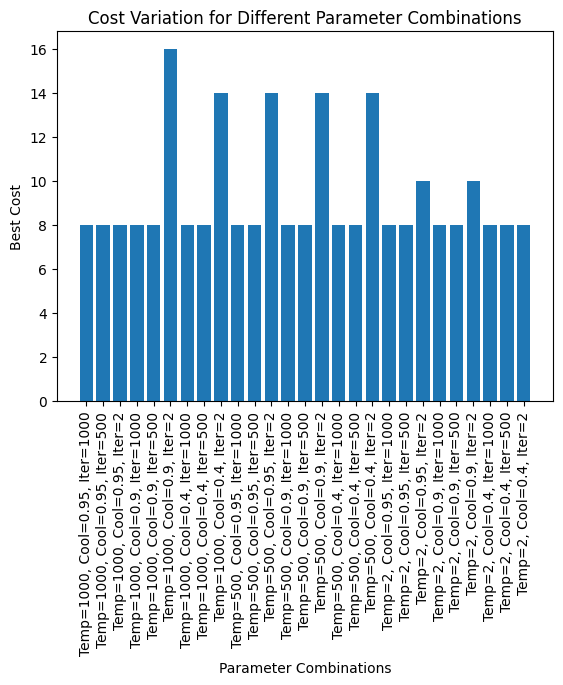

In [ ]:
import matplotlib.pyplot as plt
import random
import math
import networkx as nx

# Define the objective function, generate_neighbor, and other functions as provided in your initial code
def objective_function(graph, routing_solution):
    # Calculate the total cost of a routing solution in the graph
    total_cost = 0
    for src, dest, path in routing_solution:
        total_cost += sum(graph.get_edge_data(path[i], path[i + 1])['weight'] for i in range(len(path) - 1))
    return total_cost

def generate_neighbor(routing_solution, all_possible_paths):
    # Generate a neighboring solution by randomly changing a path in the current solution
    neighbor = routing_solution.copy()
    index_to_modify = random.randint(0, len(neighbor) - 1)
    src, dest, path = neighbor[index_to_modify]
    path_index_to_change = random.randint(0, len(path) - 1)

    alternative_paths = [p for p in all_possible_paths if p != path]

    if not alternative_paths:
        # No alternative paths available, return the same neighbor
        return neighbor

    new_path = random.choice(alternative_paths)

    neighbor[index_to_modify] = (src, dest, new_path)
    return neighbor

def calculate_all_possible_paths(graph, source, destination):
    # Calculate all possible paths between source and destination in the graph
    return list(nx.all_simple_paths(graph, source=source, target=destination))

def generate_initial_solution(graph, source, destination):
    # Generate an initial solution with a random path
    if not nx.has_path(graph, source, destination):
        raise ValueError("No path exists between source and destination.")

    all_possible_paths = calculate_all_possible_paths(graph, source, destination)
    initial_solution = [(source, destination, random.choice(all_possible_paths))]
    return initial_solution

def simulated_annealing(graph, initial_solution, temperature, cooling_rate, max_iterations):
    # Perform simulated annealing to find the best routing solution
    current_solution = initial_solution
    current_cost = objective_function(graph, current_solution)
    best_solution = current_solution
    best_cost = current_cost

    all_possible_paths = calculate_all_possible_paths(graph, initial_solution[0][0], initial_solution[0][1])

    for iteration in range(max_iterations):
        neighbor_solution = generate_neighbor(current_solution, all_possible_paths)
        neighbor_cost = objective_function(graph, neighbor_solution)

        if neighbor_cost < current_cost:
            current_solution = neighbor_solution
            current_cost = neighbor_cost
            if neighbor_cost < best_cost:
                best_solution = neighbor_solution
                best_cost = neighbor_cost
        else:
            acceptance_probability = math.exp(-abs(neighbor_cost - current_cost) / (temperature + 1e-6))
            if random.random() < acceptance_probability:
                current_solution = neighbor_solution
                current_cost = neighbor_cost

        temperature *= cooling_rate

    return best_solution, best_cost

# Function to run the simulated annealing with different parameters
def run_simulated_annealing(G, source, destination, initial_temperature, cooling_rate, max_iterations):
    initial_solution = generate_initial_solution(G, source, destination)

    best_routing_solution, best_cost = simulated_annealing(G, initial_solution, initial_temperature, cooling_rate, max_iterations)

    return best_routing_solution, best_cost

# Define a range of values for the parameters
initial_temperatures = [1000, 500, 2]
cooling_rates = [0.95, 0.9, 0.4]
max_iterations_values = [1000, 500, 2]

results = []  # To store the results

# Iterate through different parameter combinations
for initial_temperature in initial_temperatures:
    for cooling_rate in cooling_rates:
        for max_iterations in max_iterations_values:
            best_routing_solution, best_cost = run_simulated_annealing(G, source, destination, initial_temperature, cooling_rate, max_iterations)
            results.append({
                'Initial_Temperature': initial_temperature,
                'Cooling_Rate': cooling_rate,
                'Max_Iterations': max_iterations,
                'Best_Routing_Solution': best_routing_solution,
                'Best_Cost': best_cost
            })

# Create a bar chart of costs for different parameter combinations
costs = [result['Best_Cost'] for result in results]
parameters = [f"Temp={result['Initial_Temperature']}, Cool={result['Cooling_Rate']}, Iter={result['Max_Iterations']}" for result in results]

plt.bar(parameters, costs)
plt.xticks(rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('Best Cost')
plt.title('Cost Variation for Different Parameter Combinations')
plt.show()


# ***5. Genetic Algorithm (Single Point Crossover):***

In [ ]:
import random

# Set the population size for the genetic algorithm
POPULATION_SIZE = 1000

# Define a class to represent a route with a sequence of towers and total distance
class Route:
    def __init__(self, sequence, total_distance):
        self.sequence = sequence
        self.total_distance = total_distance

# Function to calculate the total distance of a given route based on a distance matrix
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    return total_distance

# Function to generate a random route given a list of towers, source, and destination
def generate_random_route(towers, source, destination):
    route_size = 2 + random.randint(0, len(towers) - 2)
    remaining_nodes = [node for node in towers if node != source and node != destination]
    random.shuffle(remaining_nodes)
    route = [source] + remaining_nodes[:route_size - 2] + [destination]
    return route

# Function to mutate a route (swap positions of towers)
def mutate_route(route):
    if len(route) == 2:
        # If the route has only source and destination, swap them directly
        route[0], route[1] = route[1], route[0]
    else:
        pos1 = random.randint(1, len(route) - 2)
        pos2 = random.randint(1, len(route) - 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]

# Function for crossover of two parent routes to create a child route
def crossover(parent1, parent2, distances):
    if len(parent1.sequence) <= 2 or len(parent2.sequence) <= 2:
        # If either parent has only source and destination, select a valid crossover point
        crossover_point = 1
    else:
        crossover_point = random.randint(1, len(parent1.sequence) - 2)

    child_sequence = parent1.sequence[:crossover_point]
    for tower in parent2.sequence:
        if tower not in child_sequence:
            child_sequence.append(tower)
    total_distance = calculate_total_distance(child_sequence, distances)
    return Route(child_sequence, total_distance)

# Define a distance matrix between towers
distances = {
    'A': {'A': 0, 'B': 3, 'C': 10, 'D': 8, 'E': 1000},
    'B': {'A': 3, 'B': 0, 'C': 2, 'D': 3, 'E': 1000},
    'C': {'A': 10, 'B': 2, 'C': 0, 'D': 1, 'E': 7},
    'D': {'A': 8, 'B': 3, 'C': 1, 'D': 0, 'E': 2},
    'E': {'A': 1000, 'B': 1000, 'C': 7, 'D': 2, 'E': 0}
}

# User input: source and destination towers
source = input("Enter source tower (A, B, C, ...): ").upper()
destination = input("Enter destination tower (A, B, C, ...): ").upper()

# Sample input: tower names
towers = ['A', 'B', 'C', 'D', 'E']

# Compute population size based on the number of towers
min_population_size = 2
max_population_size = len(towers)
population_size = max(POPULATION_SIZE, min_population_size + 1, max_population_size)  # Ensure at least 3 nodes

# Initialize the population with random routes
population = []
for _ in range(population_size):
    route = generate_random_route(towers, source, destination)
    total_distance = calculate_total_distance(route, distances)
    population.append(Route(route, total_distance))

# Genetic Algorithm
num_generations = 500
mutation_rate = 0.1

# Iterate through generations
for generation in range(num_generations):
    # Sort the population based on total distance (fitness)
    population.sort(key=lambda route: route.total_distance)

    # Select the top half of the population
    new_population = population[:population_size // 2]

    # Crossover and Mutation to generate new routes
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:population_size // 2], k=2)
        child = crossover(parent1, parent2, distances)
        if random.random() < mutation_rate:
            mutate_route(child.sequence)
        new_population.append(Route(child.sequence, calculate_total_distance(child.sequence, distances)))

    # Update the population with the new routes
    population = new_population

# Output the best route and its total distance
best_route = population[0].sequence
best_total_distance = population[0].total_distance
print("Best Route:", best_route)
print("Total Distance:", best_total_distance)


Enter source tower (A, B, C, ...): A
Enter destination tower (A, B, C, ...): E
Best Route: ['A', 'B', 'D', 'E']
Total Distance: 8


##***5.1 GA Variation: Cyclic Mapped Crossover:***

In [ ]:
import random
# Set the population size for the genetic algorithm
POPULATION_SIZE = 1000

# Define a class to represent a route with a sequence of towers and total distance
class Route:
    def __init__(self, sequence, total_distance):
        self.sequence = sequence
        self.total_distance = total_distance

# Function to calculate the total distance of a given route based on a distance matrix
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    return total_distance

# Function to generate a random route given a list of towers, source, and destination
def generate_random_route(towers, source, destination):
    route_size = 2 + random.randint(0, len(towers) - 2)
    remaining_nodes = [node for node in towers if node != source and node != destination]
    random.shuffle(remaining_nodes)
    route = [source] + remaining_nodes[:route_size - 2] + [destination]
    return route

# Function to mutate a route (swap positions of towers)
def mutate_route(route):
    if len(route) == 2:
        # If the route has only source and destination, swap them directly
        route[0], route[1] = route[1], route[0]
    else:
        pos1 = random.randint(1, len(route) - 2)
        pos2 = random.randint(1, len(route) - 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]

# Function for cyclic mapped crossover of two parent routes to create a child route
def cyclic_mapped_crossover(parent1, parent2, distances):
    # Create a cycle to map positions between parent1 and parent2
    cycle = [-1] * len(parent1.sequence)
    index = 0
    while -1 in cycle:
        if cycle[index] == -1:
            cycle[index] = parent1.sequence[index]
            index = parent2.sequence.index(parent1.sequence[index])
        else:
            index = cycle.index(-1)

    # Create a child sequence based on the cycle
    child_sequence = [-1] * len(parent1.sequence)
    for i in range(len(cycle)):
        if i % 2 == 0:
            child_sequence[i] = cycle[i]

    # Filling the remaining positions in the child sequence from parent2
    for i in range(len(parent2.sequence)):
        if parent2.sequence[i] not in child_sequence:
            for j in range(len(child_sequence)):
                if child_sequence[j] == -1:
                    child_sequence[j] = parent2.sequence[i]
                    break

    total_distance = calculate_total_distance(child_sequence, distances)
    return Route(child_sequence, total_distance)

# Define a distance matrix between towers
distances = {
    'A': {'A': 0, 'B': 3, 'C': 10, 'D': 8, 'E': 1000},
    'B': {'A': 3, 'B': 0, 'C': 2, 'D': 3, 'E': 1000},
    'C': {'A': 10, 'B': 2, 'C': 0, 'D': 1, 'E': 7},
    'D': {'A': 8, 'B': 3, 'C': 1, 'D': 0, 'E': 2},
    'E': {'A': 1000, 'B': 1000, 'C': 7, 'D': 2, 'E': 0}
}

# User input: source and destination towers
source = input("Enter source tower (A, B, C, ...): ").upper()
destination = input("Enter destination tower (A, B, C, ...): ").upper()

# Sample input: tower names
towers = ['A', 'B', 'C', 'D', 'E']

# Compute population size based on the number of towers
min_population_size = 2
max_population_size = len(towers)
population_size = max(POPULATION_SIZE, min_population_size + 1, max_population_size)  # Ensure at least 3 nodes

# Initialize the population with random routes
population = []
for _ in range(population_size):
    route = generate_random_route(towers, source, destination)
    total_distance = calculate_total_distance(route, distances)
    population.append(Route(route, total_distance))


# Genetic Algorithm
num_generations = 500
mutation_rate = 0.1

# Iterate through generations
for generation in range(num_generations):
    # Sort the population based on total distance (fitness)
    population.sort(key=lambda route: route.total_distance)
    # Select the top half of the population
    new_population = population[:population_size // 2]

    # Crossover and Mutation to generate new routes
    while len(new_population) < population_size:
        parent1, parent2 = random.choices(population[:population_size // 2], k=2)
        child = crossover(parent1, parent2, distances)
        if random.random() < mutation_rate:
            mutate_route(child.sequence)
        new_population.append(Route(child.sequence, calculate_total_distance(child.sequence, distances)))

    # Update the population with the new routes
    population = new_population

# Output the best route
best_route = population[0].sequence
best_total_distance = population[0].total_distance
print("Best Route:", best_route)
print("Total Distance:", best_total_distance)


Enter source tower (A, B, C, ...): A
Enter destination tower (A, B, C, ...): E
Best Route: ['A', 'B', 'C', 'D', 'E']
Total Distance: 8


## ***5.2 Comparative Analysis of GA:***





### ***5.2.1 Swap Mutation with Single point Crossover:***

Enter source tower (A, B, C, ...): A
Enter destination tower (A, B, C, ...): E
Population Size: 5, Best Route: ['A', 'B', 'C', 'E'], Total Distance: 12
Population Size: 50, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8
Population Size: 100, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8
Population Size: 150, Best Route: ['A', 'B', 'C', 'D', 'E'], Total Distance: 8
Population Size: 200, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8


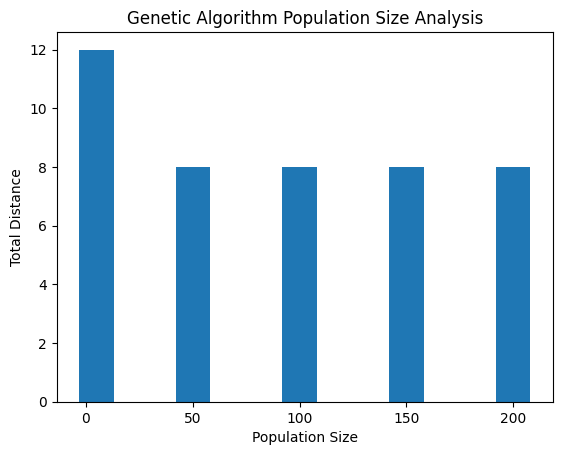

In [ ]:
import random
import matplotlib.pyplot as plt

# Define a class to represent a route with a sequence of towers and total distance
class Route:
    def __init__(self, sequence, total_distance):
        self.sequence = sequence
        self.total_distance = total_distance

# Function to calculate the total distance of a given route based on a distance matrix
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    return total_distance

# Function to generate a random route given a list of towers, source, and destination
def generate_random_route(towers, source, destination):
    route_size = 2 + random.randint(0, len(towers) - 2)
    remaining_nodes = [node for node in towers if node != source and node != destination]
    random.shuffle(remaining_nodes)
    route = [source] + remaining_nodes[:route_size - 2] + [destination]
    return route

# Function to mutate a route (swap positions of towers)
def mutate_route(route):
    if len(route) == 2:
        # If the route has only source and destination, swap them directly
        route[0], route[1] = route[1], route[0]
    else:
        pos1 = random.randint(1, len(route) - 2)
        pos2 = random.randint(1, len(route) - 2)
        route[pos1], route[pos2] = route[pos2], route[pos1]

# Function for crossover of two parent routes to create a child route
def crossover(parent1, parent2, distances):
    if len(parent1.sequence) <= 2 or len(parent2.sequence) <= 2:
        # If either parent has only source and destination, select a valid crossover point
        crossover_point = 1
    else:
        crossover_point = random.randint(1, len(parent1.sequence) - 2)

    child_sequence = parent1.sequence[:crossover_point]
    for tower in parent2.sequence:
        if tower not in child_sequence:
            child_sequence.append(tower)
    total_distance = calculate_total_distance(child_sequence, distances)
    return Route(child_sequence, total_distance)

# Function to perform the genetic algorithm
def genetic_algorithm(distances, towers, source, destination, population_size, num_generations, mutation_rate):
    # Initialize the population with random routes
    population = []
    distances_cache = {}  # Cache distances to avoid redundant calculations

    for _ in range(population_size):
        route = generate_random_route(towers, source, destination)
        total_distance = calculate_total_distance(route, distances)
        population.append(Route(route, total_distance))
        distances_cache[tuple(route)] = total_distance

    # Iterate through generations
    for generation in range(num_generations):
        # Sort the population based on total distance (fitness)
        population.sort(key=lambda route: route.total_distance)

        # Select the top half of the population
        new_population = population[:population_size // 2]

        # Crossover and Mutation to generate new routes
        while len(new_population) < population_size:
            parent1, parent2 = random.choices(population[:population_size // 2], k=2)
            child = crossover(parent1, parent2, distances)
            if random.random() < mutation_rate:
                mutate_route(child.sequence)

            # Update the distances cache with the new route
            new_route_key = tuple(child.sequence)
            if new_route_key not in distances_cache:
                distances_cache[new_route_key] = calculate_total_distance(child.sequence, distances)

            new_population.append(Route(child.sequence, distances_cache[new_route_key]))

        # Update the population with the new routes
        population = new_population

    # Output the best route and its total distance
    best_route = population[0].sequence
    best_total_distance = population[0].total_distance
    return best_route, best_total_distance

# Define a distance matrix between towers
distances = {
    'A': {'A': 0, 'B': 3, 'C': 10, 'D': 8, 'E': 1000},
    'B': {'A': 3, 'B': 0, 'C': 2, 'D': 3, 'E': 1000},
    'C': {'A': 10, 'B': 2, 'C': 0, 'D': 1, 'E': 7},
    'D': {'A': 8, 'B': 3, 'C': 1, 'D': 0, 'E': 2},
    'E': {'A': 1000, 'B': 1000, 'C': 7, 'D': 2, 'E': 0}
}

# User input: source and destination towers
source = input("Enter source tower (A, B, C, ...): ").upper()
destination = input("Enter destination tower (A, B, C, ...): ").upper()

# Sample input: tower names
towers = ['A', 'B', 'C', 'D', 'E']

# Vary population size and plot results as bar graph
population_sizes = [5, 50, 100, 150, 200]
num_generations = 100
mutation_rate = 0.8

# Initialize lists to store results
best_distances = []
generation_numbers = []

for pop_size in population_sizes:
    best_route, best_total_distance = genetic_algorithm(distances, towers, source, destination, pop_size, num_generations, mutation_rate)
    print(f"Population Size: {pop_size}, Best Route: {best_route}, Total Distance: {best_total_distance}")

    # Store results for plotting
    best_distances.append(best_total_distance)
    generation_numbers.append(pop_size)

# Plot bar graph for each population size versus total distance
plt.bar(generation_numbers, best_distances,width=16)
plt.xlabel('Population Size')
plt.ylabel('Total Distance')
plt.title('Genetic Algorithm Population Size Analysis')
plt.show()


### ***5.2.2 Reverse Sequence Mutation with Single point Crossover:***

Enter source tower (A, B, C, ...): A
Enter destination tower (A, B, C, ...): E
Population Size: 5, Best Route: ['A', 'C', 'D', 'E'], Total Distance: 13
Population Size: 50, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8
Population Size: 100, Best Route: ['A', 'B', 'C', 'D', 'E'], Total Distance: 8
Population Size: 150, Best Route: ['A', 'B', 'C', 'D', 'E'], Total Distance: 8
Population Size: 200, Best Route: ['A', 'B', 'C', 'D', 'E'], Total Distance: 8


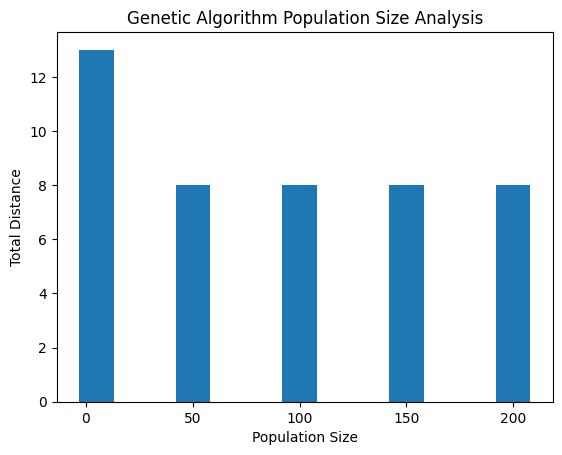

In [ ]:
import random
import matplotlib.pyplot as plt

# Define a class to represent a route with a sequence of towers and total distance
class Route:
    def __init__(self, sequence, total_distance):
        self.sequence = sequence
        self.total_distance = total_distance

# Function to calculate the total distance of a given route based on a distance matrix
def calculate_total_distance(route, distances):
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    return total_distance

# Function to generate a random route given a list of towers, source, and destination
def generate_random_route(towers, source, destination):
    route_size = 2 + random.randint(0, len(towers) - 2)
    remaining_nodes = [node for node in towers if node != source and node != destination]
    random.shuffle(remaining_nodes)
    route = [source] + remaining_nodes[:route_size - 2] + [destination]
    return route

# Function to mutate a route by reversing the order of a random subsequence
def reverse_sequence_mutation(route):
    if len(route) <= 2:
        # If the route has only source and destination, no mutation is possible
        return

    start_index = random.randint(1, len(route) - 2)
    end_index = random.randint(start_index, len(route) - 1)

    # Reverse the subsequence
    route[start_index:end_index + 1] = reversed(route[start_index:end_index + 1])

# Function for crossover of two parent routes to create a child route
def crossover(parent1, parent2, distances):
    if len(parent1.sequence) <= 2 or len(parent2.sequence) <= 2:
        # If either parent has only source and destination, select a valid crossover point
        crossover_point = 1
    else:
        crossover_point = random.randint(1, len(parent1.sequence) - 2)

    child_sequence = parent1.sequence[:crossover_point]
    for tower in parent2.sequence:
        if tower not in child_sequence:
            child_sequence.append(tower)
    total_distance = calculate_total_distance(child_sequence, distances)
    return Route(child_sequence, total_distance)

# Function to perform the genetic algorithm
def genetic_algorithm(distances, towers, source, destination, population_size, num_generations, mutation_rate, mutation_function):
    # Initialize the population with random routes
    population = []
    distances_cache = {}  # Cache distances to avoid redundant calculations

    for _ in range(population_size):
        route = generate_random_route(towers, source, destination)
        total_distance = calculate_total_distance(route, distances)
        population.append(Route(route, total_distance))
        distances_cache[tuple(route)] = total_distance

    # Iterate through generations
    for generation in range(num_generations):
        # Sort the population based on total distance (fitness)
        population.sort(key=lambda route: route.total_distance)

        # Select the top half of the population
        new_population = population[:population_size // 2]

        # Crossover and Mutation to generate new routes
        while len(new_population) < population_size:
            parent1, parent2 = random.choices(population[:population_size // 2], k=2)
            child = crossover(parent1, parent2, distances)
            if random.random() < mutation_rate:
                mutation_function(child.sequence)
                # Update the distances cache with the new route
                new_route_key = tuple(child.sequence)
                if new_route_key not in distances_cache:
                    distances_cache[new_route_key] = calculate_total_distance(child.sequence, distances)

                new_population.append(Route(child.sequence, distances_cache[new_route_key]))

        # Update the population with the new routes
        population = new_population

    # Output the best route and its total distance
    best_route = population[0].sequence
    best_total_distance = population[0].total_distance
    return best_route, best_total_distance

# Define a distance matrix between towers
distances = {
    'A': {'A': 0, 'B': 3, 'C': 10, 'D': 8, 'E': 1000},
    'B': {'A': 3, 'B': 0, 'C': 2, 'D': 3, 'E': 1000},
    'C': {'A': 10, 'B': 2, 'C': 0, 'D': 1, 'E': 7},
    'D': {'A': 8, 'B': 3, 'C': 1, 'D': 0, 'E': 2},
    'E': {'A': 1000, 'B': 1000, 'C': 7, 'D': 2, 'E': 0}
}

# User input: source and destination towers
source = input("Enter source tower (A, B, C, ...): ").upper()
destination = input("Enter destination tower (A, B, C, ...): ").upper()

# Sample input: tower names
towers = ['A', 'B', 'C', 'D', 'E']

# Vary population size and plot results as bar graph
population_sizes = [5, 50, 100, 150, 200]
num_generations = 100
mutation_rate = 0.8

# Initialize lists to store results
best_distances = []
generation_numbers = []

for pop_size in population_sizes:
    best_route, best_total_distance = genetic_algorithm(
        distances, towers, source, destination, pop_size, num_generations, mutation_rate, reverse_sequence_mutation
    )
    print(f"Population Size: {pop_size}, Best Route: {best_route}, Total Distance: {best_total_distance}")

    # Store results for plotting
    best_distances.append(best_total_distance)
    generation_numbers.append(pop_size)

# Plot bar graph for each population size versus total distance
plt.bar(generation_numbers, best_distances, width=16)
plt.xlabel('Population Size')
plt.ylabel('Total Distance')
plt.title('Genetic Algorithm Population Size Analysis')
plt.show()


### ***5.2.3 Reverse Sequence Mutation with adding Revisit penalty term and Average total distance to Evaluation Function:***

Enter source tower (A, B, C, ...): A
Enter destination tower (A, B, C, ...): E
Population Size: 5, Best Route: ['A', 'C', 'E'], Total Distance: 17, Average Distance: 5.666666666666667, Revisit Penalty: 0
Population Size: 50, Best Route: ['A', 'B', 'C', 'D', 'E'], Total Distance: 8, Average Distance: 1.6, Revisit Penalty: 0
Population Size: 100, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8, Average Distance: 2.0, Revisit Penalty: 0
Population Size: 150, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8, Average Distance: 2.0, Revisit Penalty: 0
Population Size: 200, Best Route: ['A', 'B', 'D', 'E'], Total Distance: 8, Average Distance: 2.0, Revisit Penalty: 0


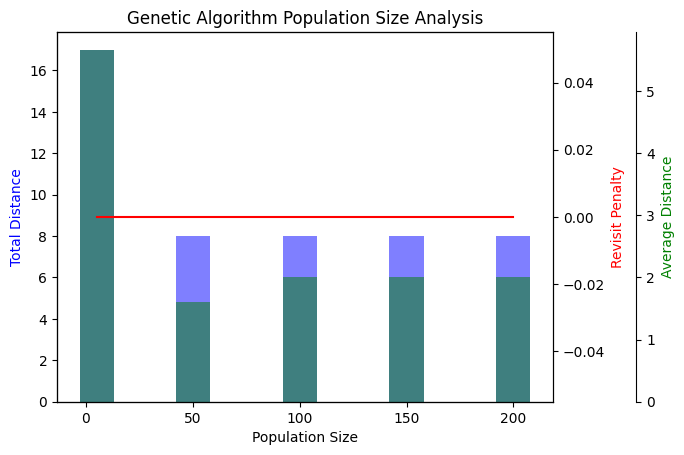

In [ ]:
import random
import matplotlib.pyplot as plt

# Define a class to represent a route with a sequence of towers and total distance
class Route:
    def __init__(self, sequence, total_distance, average_distance, revisit_penalty):
        self.sequence = sequence
        self.total_distance = total_distance
        self.average_distance = average_distance
        self.revisit_penalty = revisit_penalty

# Function to calculate the total distance, average distance, and penalty of a given route based on a distance matrix
def calculate_objectives(route, distances):
    total_distance = 0
    unique_towers = set()
    revisit_penalty = 0

    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
        unique_towers.add(route[i])

        # Check for revisiting towers
        if route[i + 1] in unique_towers:
            revisit_penalty += 1

    average_distance = total_distance / len(route)

    return total_distance, average_distance, revisit_penalty

# Function to generate a random route given a list of towers, source, and destination
def generate_random_route(towers, source, destination):
    route_size = 2 + random.randint(0, len(towers) - 2)
    remaining_nodes = [node for node in towers if node != source and node != destination]
    random.shuffle(remaining_nodes)
    route = [source] + remaining_nodes[:route_size - 2] + [destination]
    return route

# Function to mutate a route by reversing the order of a random subsequence
def reverse_sequence_mutation(route):
    if len(route) <= 2:
        # If the route has only source and destination, no mutation is possible
        return

    start_index = random.randint(1, len(route) - 2)
    end_index = random.randint(start_index, len(route) - 1)

    # Reverse the subsequence
    route[start_index:end_index + 1] = reversed(route[start_index:end_index + 1])

# Function for crossover of two parent routes to create a child route
def crossover(parent1, parent2, distances):
    if len(parent1.sequence) <= 2 or len(parent2.sequence) <= 2:
        # If either parent has only source and destination, select a valid crossover point
        crossover_point = 1
    else:
        crossover_point = random.randint(1, len(parent1.sequence) - 2)

    child_sequence = parent1.sequence[:crossover_point]
    for tower in parent2.sequence:
        if tower not in child_sequence:
            child_sequence.append(tower)

    objectives = calculate_objectives(child_sequence, distances)
    return Route(child_sequence, *objectives)

# Function to perform the genetic algorithm
def genetic_algorithm(distances, towers, source, destination, population_size, num_generations, mutation_rate, mutation_function):
    # Initialize the population with random routes
    population = []
    distances_cache = {}  # Cache distances to avoid redundant calculations

    for _ in range(population_size):
        route = generate_random_route(towers, source, destination)
        objectives = calculate_objectives(route, distances)
        population.append(Route(route, *objectives))
        distances_cache[tuple(route)] = objectives

    # Iterate through generations
    for generation in range(num_generations):
        # Sort the population based on total distance (fitness)
        population.sort(key=lambda route: route.total_distance + route.revisit_penalty)  # Consider both total distance and revisit penalty

        # Select the top half of the population
        new_population = population[:population_size // 2]

        # Crossover and Mutation to generate new routes
        while len(new_population) < population_size:
            parent1, parent2 = random.choices(population[:population_size // 2], k=2)
            child = crossover(parent1, parent2, distances)
            if random.random() < mutation_rate:
                mutation_function(child.sequence)
                # Update the distances cache with the new route
                new_route_key = tuple(child.sequence)
                if new_route_key not in distances_cache:
                    distances_cache[new_route_key] = calculate_objectives(child.sequence, distances)

                new_population.append(Route(child.sequence, *distances_cache[new_route_key]))

        # Update the population with the new routes
        population = new_population

    # Output the best route and its total distance
    best_route = population[0].sequence
    best_total_distance = population[0].total_distance
    best_average_distance = population[0].average_distance
    best_revisit_penalty = population[0].revisit_penalty
    return best_route, best_total_distance, best_average_distance, best_revisit_penalty

# Define a distance matrix between towers
distances = {
    'A': {'A': 0, 'B': 3, 'C': 10, 'D': 8, 'E': 1000},
    'B': {'A': 3, 'B': 0, 'C': 2, 'D': 3, 'E': 1000},
    'C': {'A': 10, 'B': 2, 'C': 0, 'D': 1, 'E': 7},
    'D': {'A': 8, 'B': 3, 'C': 1, 'D': 0, 'E': 2},
    'E': {'A': 1000, 'B': 1000, 'C': 7, 'D': 2, 'E': 0}
}

# User input: source and destination towers
source = input("Enter source tower (A, B, C, ...): ").upper()
destination = input("Enter destination tower (A, B, C, ...): ").upper()

# Sample input: tower names
towers = ['A', 'B', 'C', 'D', 'E']

# Vary population size and plot results as bar graph
population_sizes = [5, 50, 100, 150, 200]
num_generations = 100
mutation_rate = 0.8

# Initialize lists to store results
best_distances = []
best_average_distances = []
best_revisit_penalties = []
generation_numbers = []

for pop_size in population_sizes:
    best_route, best_total_distance, best_average_distance, best_revisit_penalty = genetic_algorithm(
        distances, towers, source, destination, pop_size, num_generations, mutation_rate, reverse_sequence_mutation
    )
    print(f"Population Size: {pop_size}, Best Route: {best_route}, Total Distance: {best_total_distance}, Average Distance: {best_average_distance}, Revisit Penalty: {best_revisit_penalty}")

    # Store results for plotting
    best_distances.append(best_total_distance)
    best_average_distances.append(best_average_distance)
    best_revisit_penalties.append(best_revisit_penalty)
    generation_numbers.append(pop_size)

# Plot bar graph for each population size versus total distance, average distance, and revisit penalty
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax3 = ax1.twinx()

ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the right axis

ax1.bar(generation_numbers, best_distances, width=16, alpha=0.5, label='Total Distance',color='blue')
ax2.bar(generation_numbers, best_average_distances, width=16, alpha=0.5, label='Average Distance', color='green')
ax3.plot(generation_numbers, best_revisit_penalties, label='Revisit Penalty', color='red')

ax1.set_xlabel('Population Size')
ax1.set_ylabel('Total Distance', color='blue')
ax2.set_ylabel('Average Distance', color='green')
ax3.set_ylabel('Revisit Penalty', color='red')

plt.title('Genetic Algorithm Population Size Analysis')
plt.show()
